In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [17]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [14]:
p = cogsworth.pop.Population(1000)
p.sample_initial_binaries()
p.perform_stellar_evolution()

In [15]:
n_bpp_rows = [len(p.bpp.loc[i]) for i in p.bin_nums]
complicated_binary = p.bin_nums[np.argmax(n_bpp_rows)]

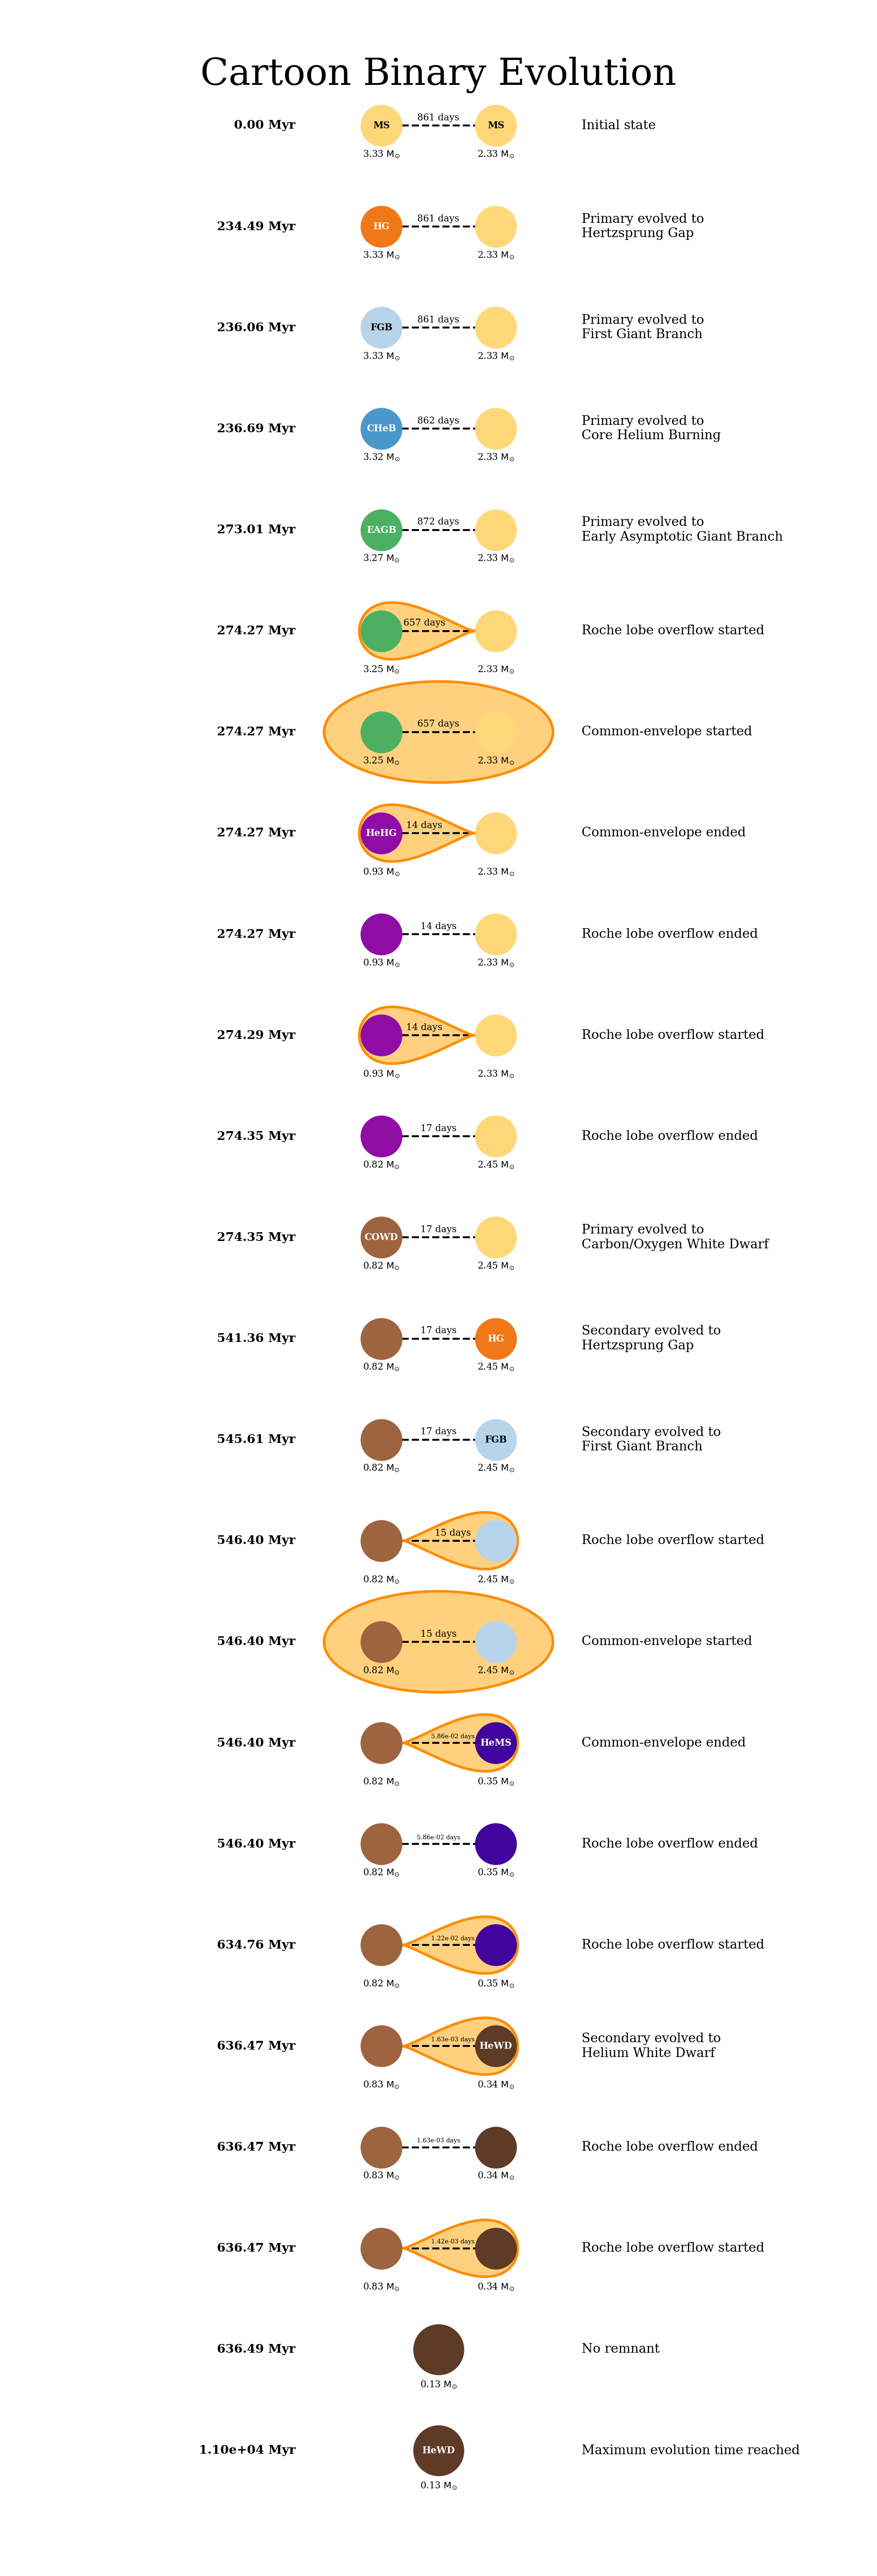

In [18]:
p.plot_cartoon_binary(complicated_binary);

In [19]:
# reduce the population to just the complicated binary
p = p[int(complicated_binary)]

# get the bcm table to contain every timestep
p.bcm_timestep_conditions = [["binstate=0", "dtp=0.0"]]

# re-perform evolution
p.perform_stellar_evolution()

In [22]:
# import the plotting routine from COSMIC
from cosmic.plotting import plot_binary_evol

# reset plotting style to avoid fontsize issues
plt.style.use("default")

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


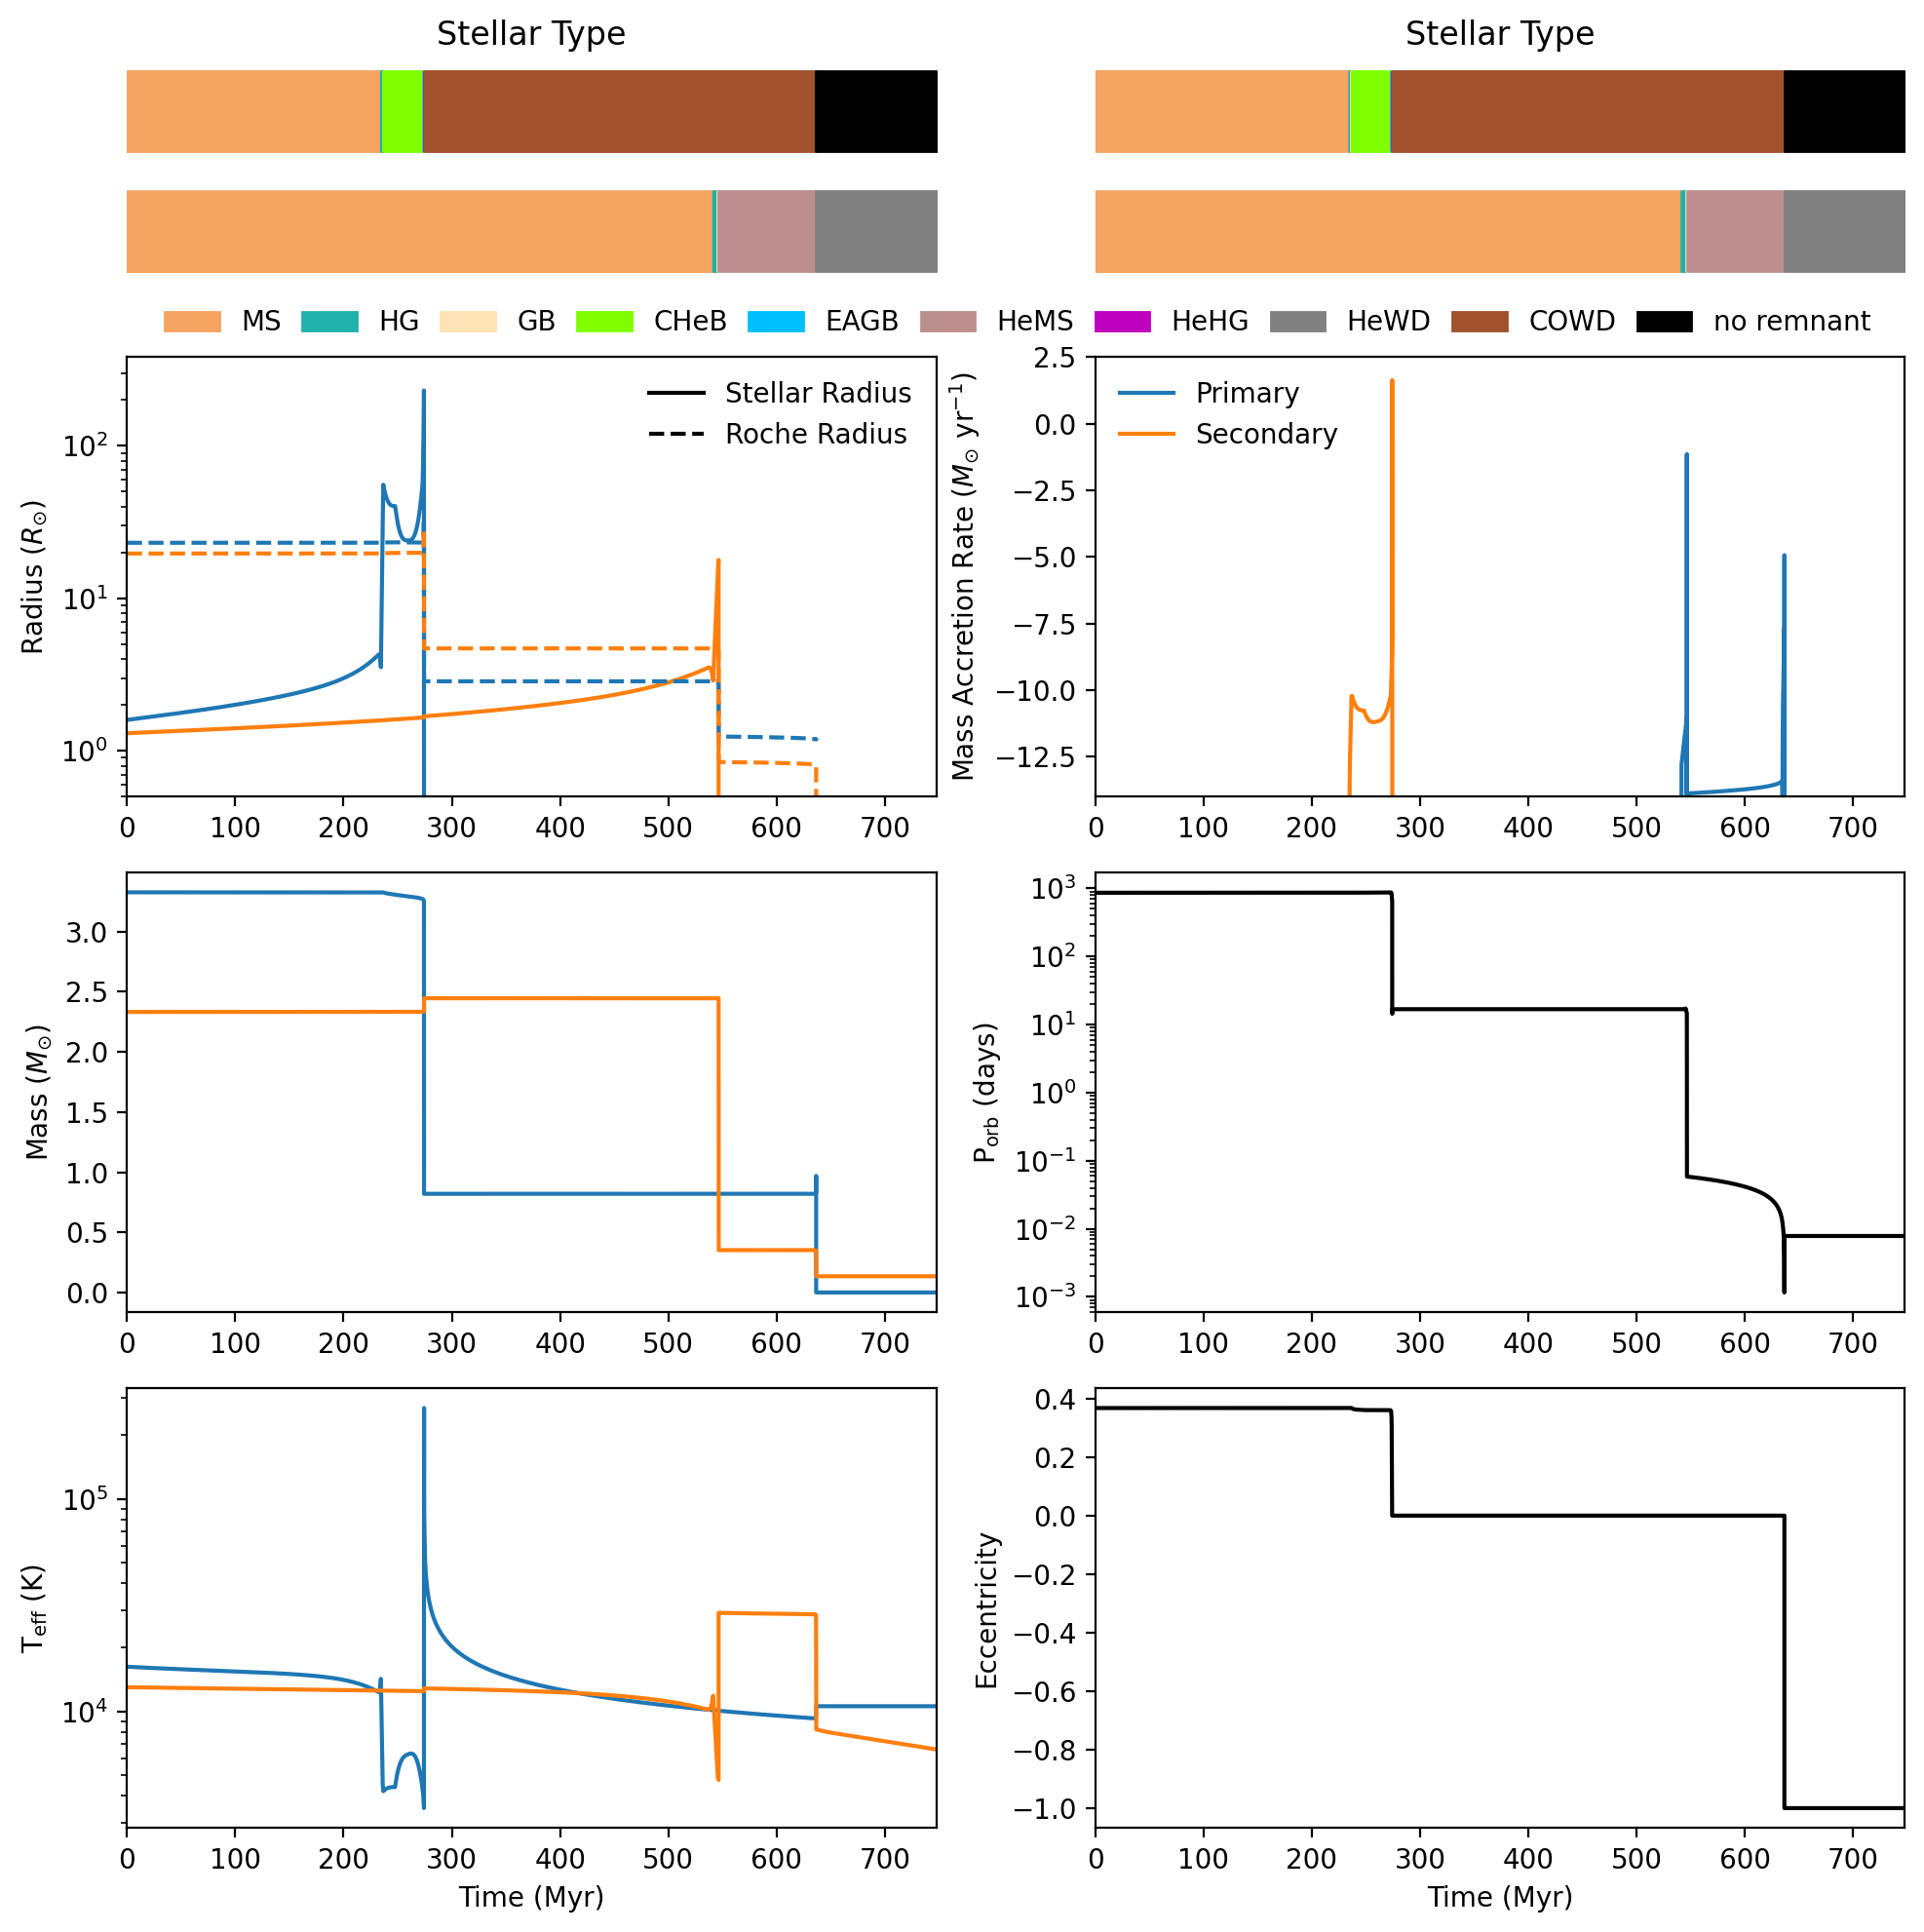

In [29]:
plot_binary_evol(p.bcm[p.bcm["tphys"] < 1000])
plt.show()

In [36]:
from ipywidgets import interact

In [37]:
def plot_binary_times(bcm, tmin=None, tmax=None):
    if tmin is not None:
        bcm = bcm[bcm['tphys'] >= tmin]
    if tmax is not None:
        bcm = bcm[bcm['tphys'] < tmax]
        
    plot_binary_evol(bcm)

In [39]:
from ipywidgets import FloatSlider, fixed

In [45]:
max(p.bcm.loc[3]["tphys"])

9518.0

In [48]:
def interactive_evolution(bin_num):
    bcm = p.bcm.loc[bin_num]
    max_time = max(bcm['tphys'])
    return interact(plot_binary_times, bcm=fixed(bcm),
                    tmin=FloatSlider(value=0, min=0, max=max_time, continuous_update=False),
                    tmax=FloatSlider(value=max_time, min=0, max=max_time, continuous_update=False))

In [56]:
plt.style.use("default")

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


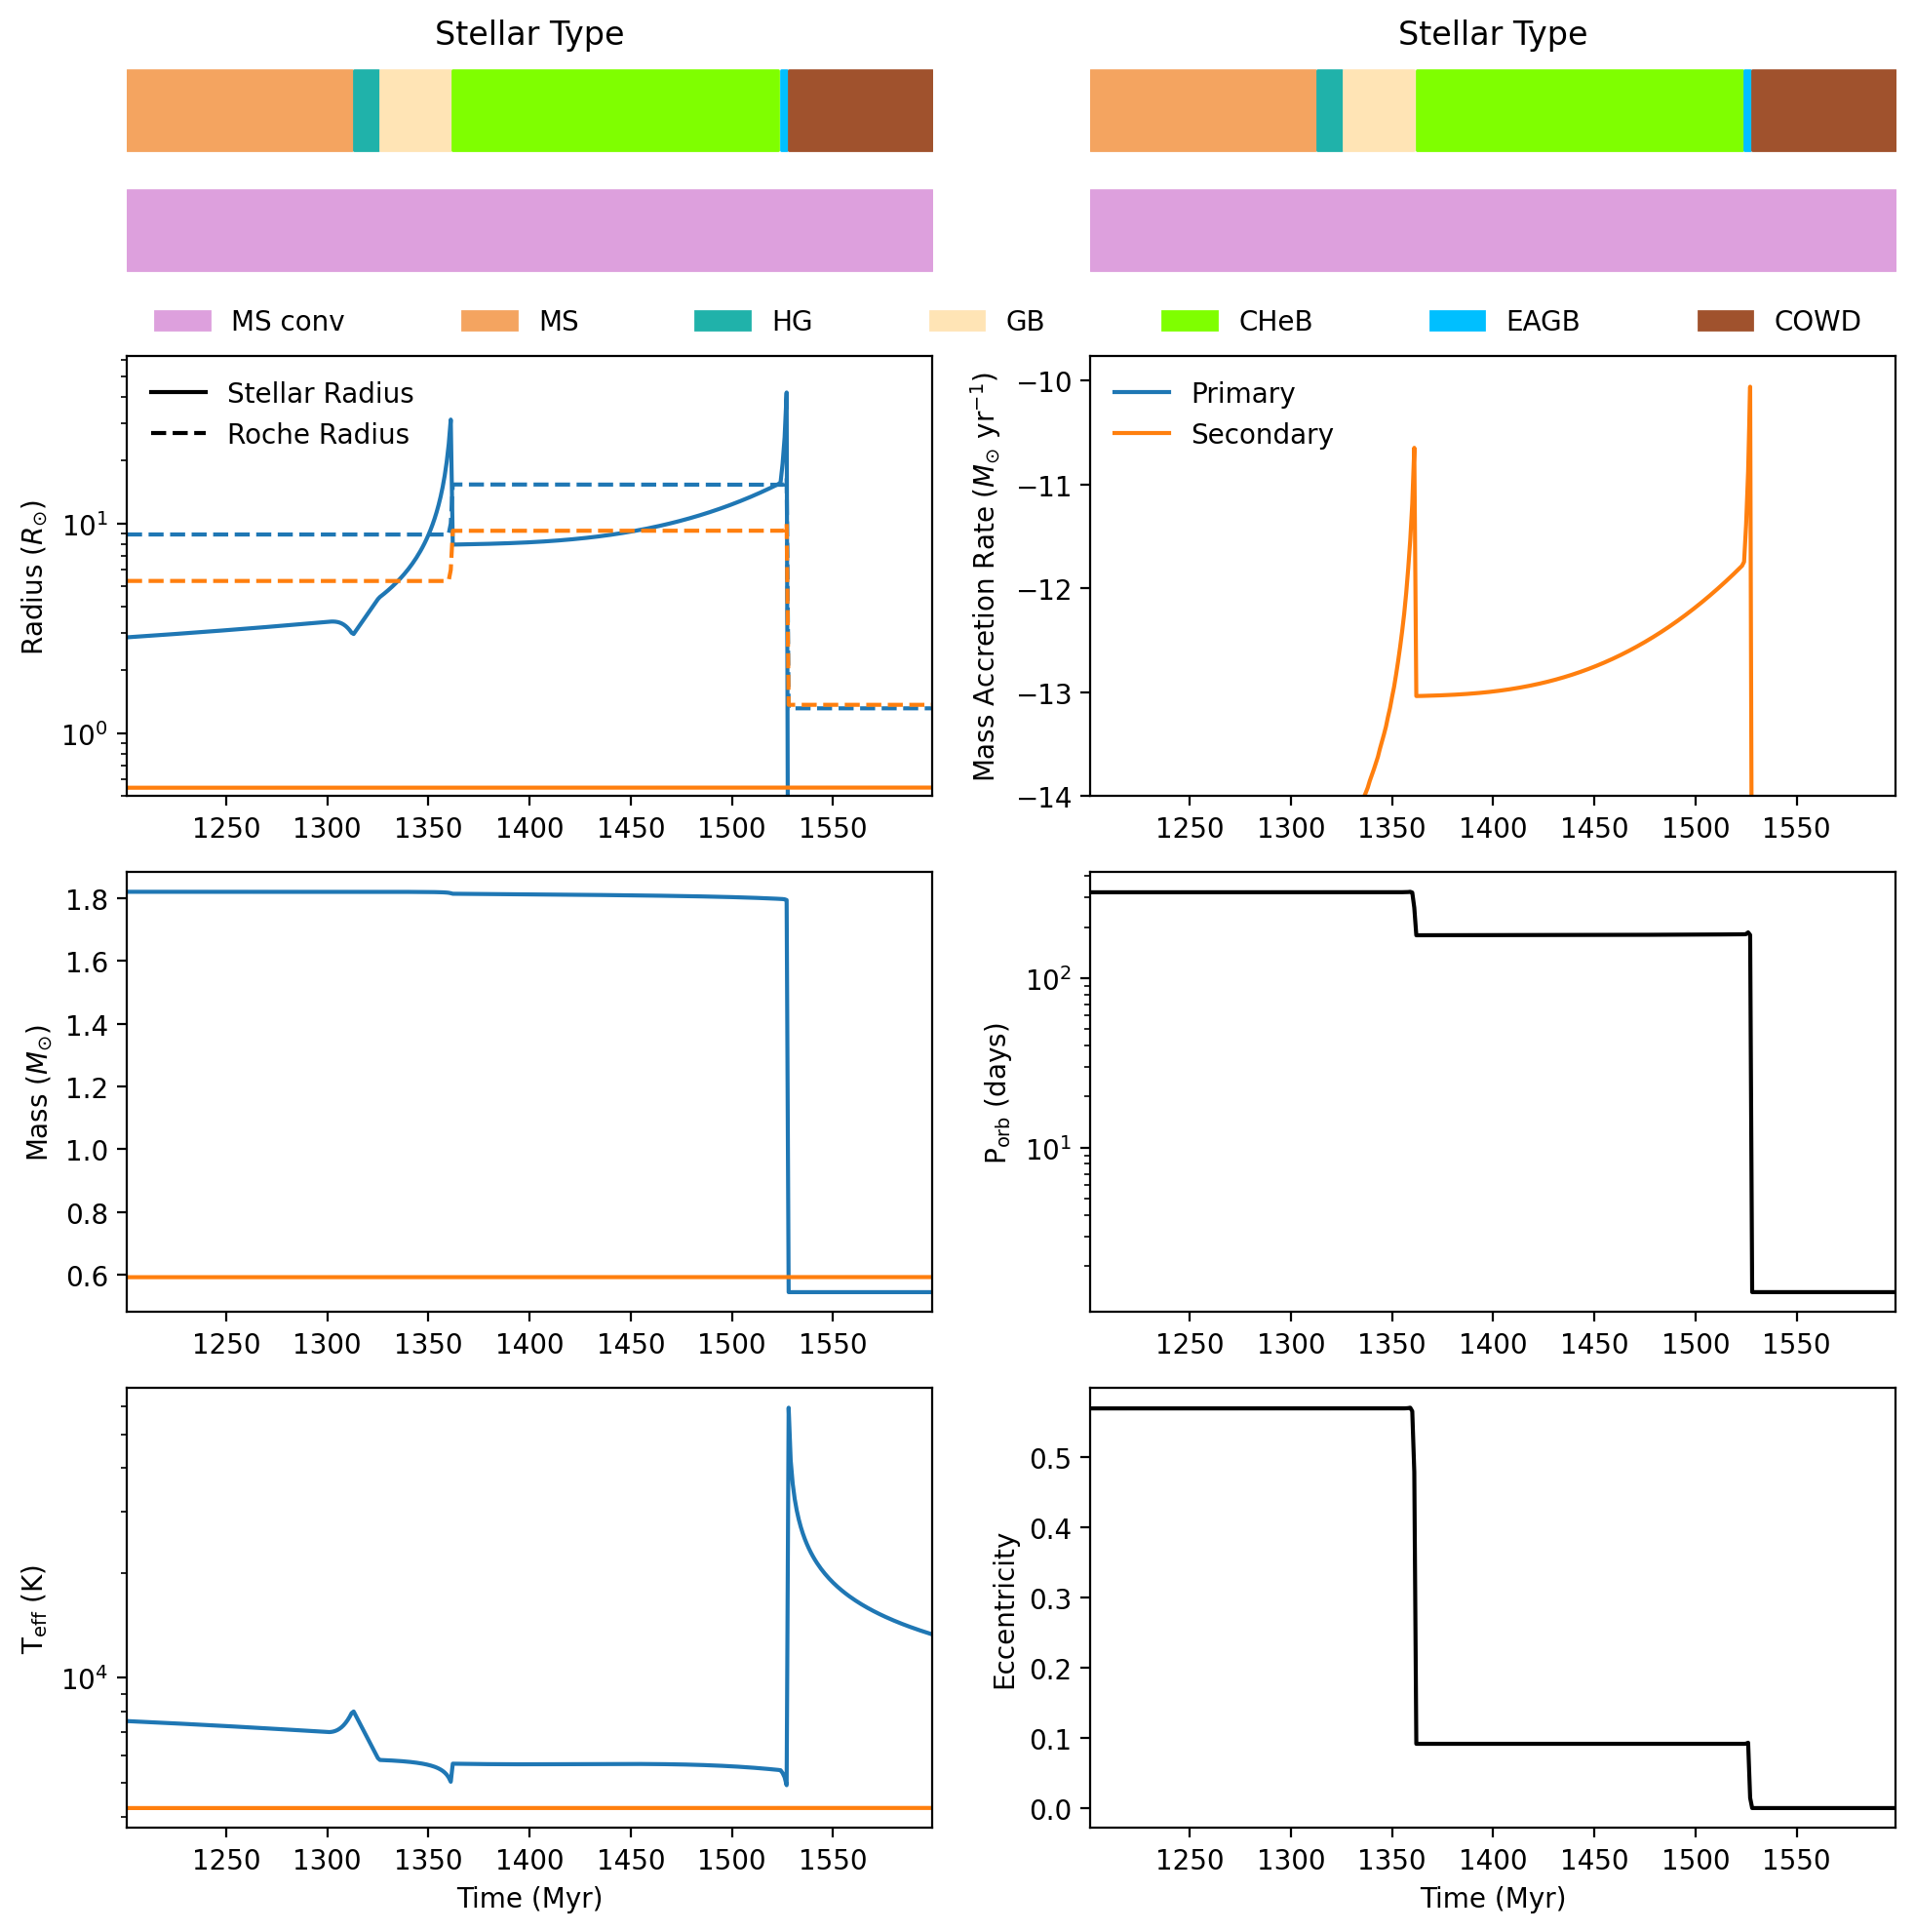

In [35]:
plot_binary_evol(p.bcm.loc[2][(p.bcm.loc[2]["tphys"] > 1200) & (p.bcm.loc[2]["tphys"] < 1600)]);

In [45]:
cosmic.plotting

AttributeError: module 'cosmic' has no attribute 'plotting'